In [5]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [6]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [7]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
# searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
# #searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
# #mcunet

# #searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
# searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
# print(searchdir)



# for icisip
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe")
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
Count1 =  [59421, 880, 593, 623, 483, 611, 514, 618, 482, 806, 505]
Count2 =  [59442, 948, 600, 560, 499, 560, 491, 692, 446, 797, 501]
Count3 =  [59077, 849, 554, 538, 464, 548, 463, 573, 411, 751, 482]
Dice =  [0.9940351497101705, 0.9288840262582057, 0.9287510477787091, 0.9095519864750634, 0.945010183299389, 0.9359521776259607, 0.9213930348258706, 0.8748091603053435, 0.8857758620689655, 0.9369931378

[ WARN:0@1109.755] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.755] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.755] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.757] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.757] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-2.png'): can't open/read file: check file

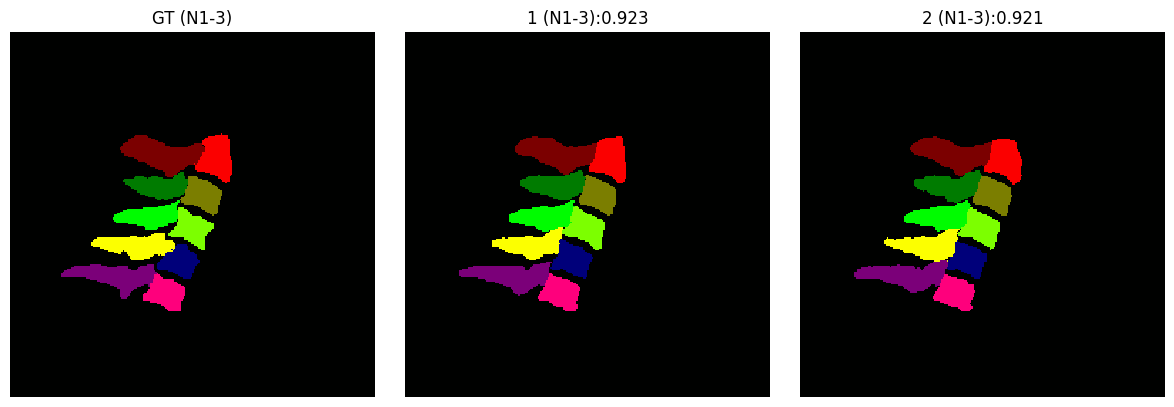

[ WARN:0@1109.948] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.948] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.948] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.949] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1109.949] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-5.png'): can't open/read file: check file

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
image: N1-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N

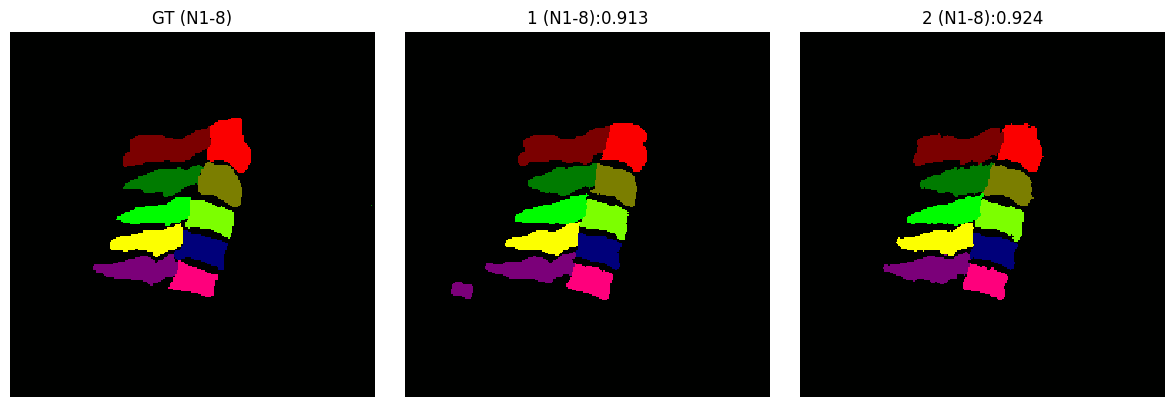

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
Count1 =  [57952, 1267, 682, 839, 539, 895, 538, 848, 478, 1082, 416]
Count2 =  [57738, 1169, 762, 1020, 503, 866, 528, 939, 464, 1118, 429]
Count3 =  [57330, 1133, 670, 816, 491, 832, 517, 823, 446, 997, 378]
Dice =  [0.991096896879592, 0.9302134646962233, 0.9279778393351801, 0.877891339429801, 0.9424184261036468, 0.9449176604202157, 0.9699812382739212, 0.9210968102965864, 0.9469214437367304, 0.9063636363636364, 0.8946745562130177, 0.9262456414868959]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
Count1 =  [57744, 1312, 655, 1000, 531, 885, 513, 853, 472, 1112, 459]
Count2 =  [57738, 1169, 762, 1020, 503, 866, 528, 939, 464, 1118, 429]
Count3 =  [57160, 1140, 650, 910, 493, 8

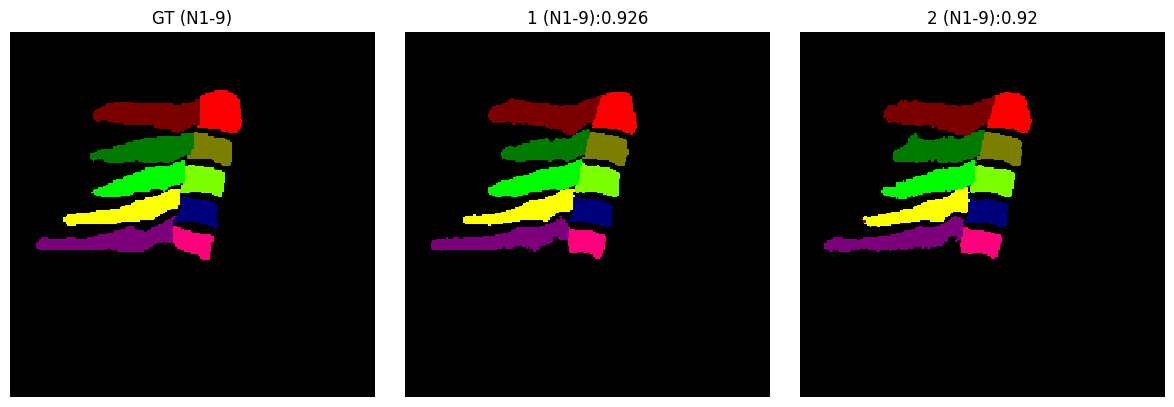

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
image: N2-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labele

[ WARN:0@1110.338] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.338] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.338] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.340] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.340] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N2-1.png'): can't open/read file: check f

Count1 =  [57587, 1218, 751, 894, 565, 853, 563, 773, 616, 1106, 610]
Count2 =  [57239, 1211, 891, 872, 620, 847, 630, 729, 674, 1150, 673]
Count3 =  [56813, 1142, 742, 798, 547, 764, 552, 674, 605, 957, 591]
Dice =  [0.9895494051869785, 0.9403046521202141, 0.9037758830694276, 0.9037372593431483, 0.9232067510548523, 0.8988235294117647, 0.9253981559094719, 0.8974700399467377, 0.937984496124031, 0.848404255319149, 0.921278254091972, 0.9100383276390769]


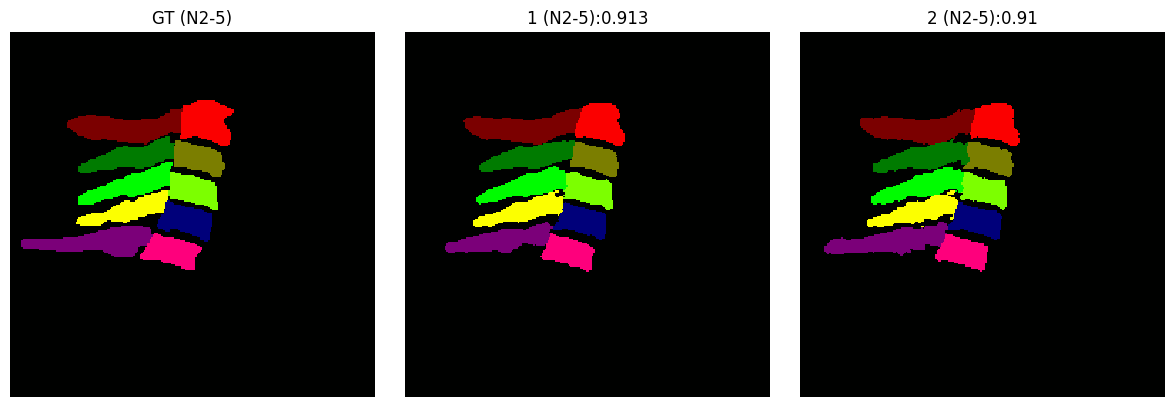

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
image: N2-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
image: N2-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/

[ WARN:0@1110.540] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.540] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.540] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.542] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.542] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N2-7.png'): can't open/read file: check file

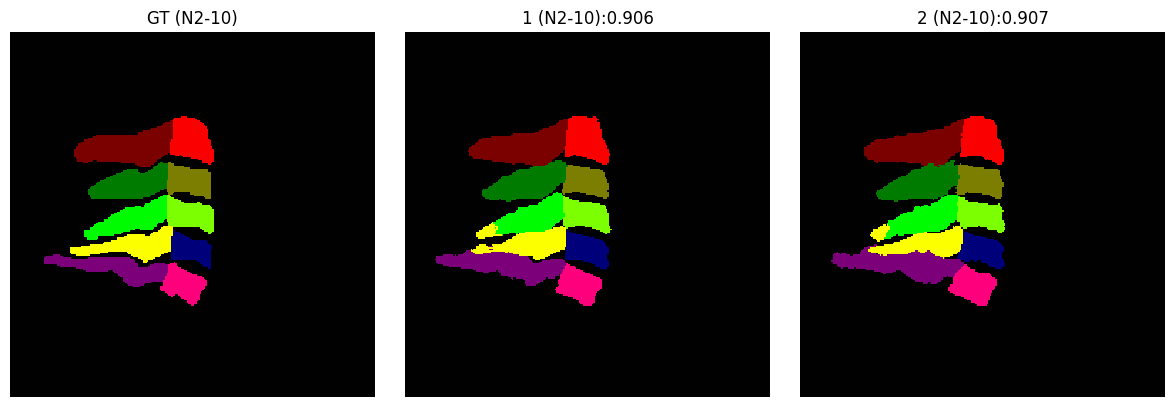

[ WARN:0@1110.739] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.739] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.739] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
image: N3-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png
image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N

[ WARN:0@1110.741] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.741] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.741] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.742] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-3.png'): can't open/read file: check file path/integrity
[ WARN:0@1110.742] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-3.png'): can't open/read file: check file

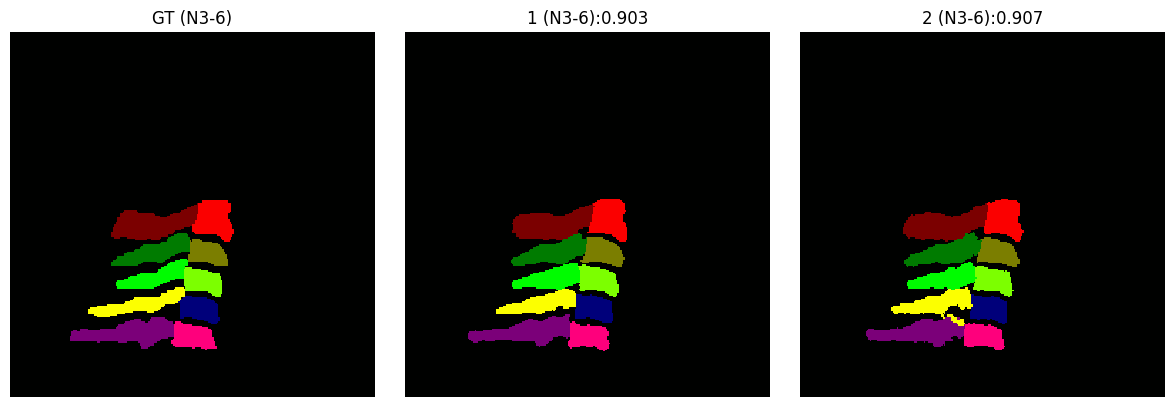

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
Count1 =  [58058, 1144, 724, 725, 480, 800, 509, 864, 530, 1153, 549]
Count2 =  [58383, 1100, 666, 649, 465, 704, 474, 874, 517, 1162, 542]
Count3 =  [57754, 1024, 652, 620, 447, 690, 461, 803, 498, 1047, 526]
Dice =  [0.9919873584046857, 0.9126559714795008, 0.9381294964028777, 0.9024745269286754, 0.946031746031746, 0.9175531914893617, 0.9379450661241099, 0.9240506329113924, 0.9512893982808023, 0.9045356371490281, 0.9642529789184234, 0.9298918645715918]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
Count1 =  [58016, 1073, 704, 736, 516, 702, 499, 947, 524, 1268, 551]
Count2 =  [58383, 1100, 666, 649, 465, 704, 474, 874, 517, 1162, 542]
Count3 =  [57759, 997, 640, 622, 458, 647

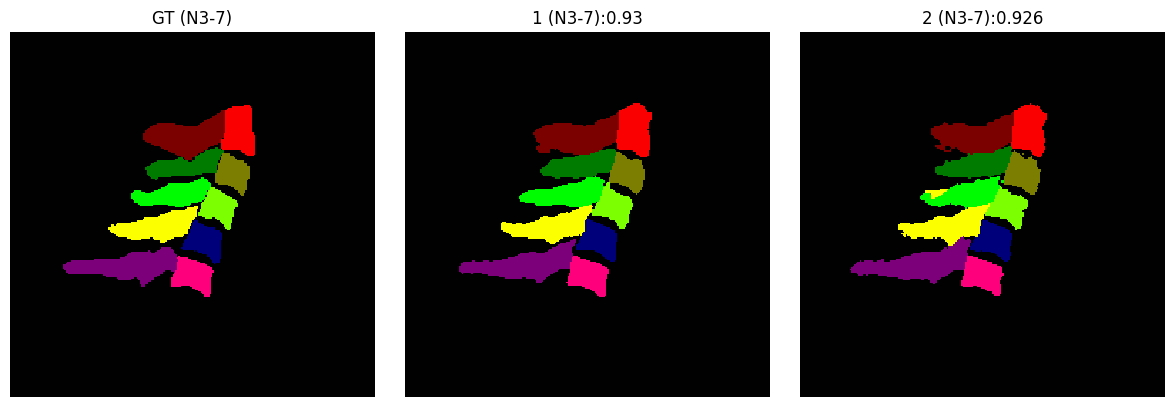

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
Count1 =  [58362, 1278, 708, 813, 530, 824, 512, 733, 424, 880, 472]
Count2 =  [57779, 1470, 731, 900, 600, 810, 645, 781, 406, 924, 490]
Count3 =  [57504, 1271, 653, 773, 522, 724, 509, 696, 395, 790, 443]
Dice =  [0.9902446164575818, 0.9250363901018923, 0.9075747046560111, 0.9025102159953299, 0.9238938053097345, 0.8861689106487148, 0.8798617113223854, 0.9194187582562747, 0.9518072289156626, 0.8758

[ WARN:0@1111.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.139] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.139] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N3-9.png'): can't open/read file: check file

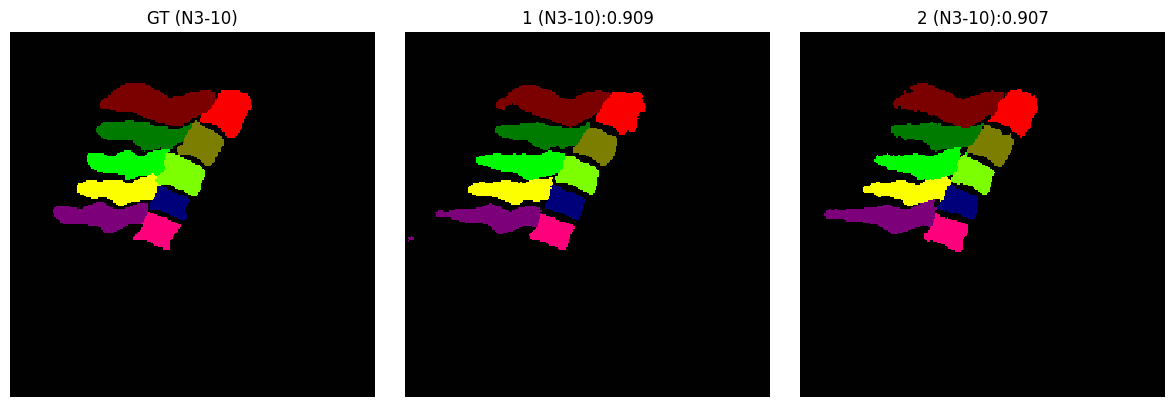

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
image: N4-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
Count1 =  [57577, 1293, 791, 870, 614, 893, 638, 785, 586, 903, 586]
Count2 =  [57438, 1260, 932, 804, 630, 877, 634, 745, 635, 966, 615]
Count3 =  [56994, 1202, 750, 758, 574, 825, 587, 715, 577, 8

[ WARN:0@1111.392] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.393] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.393] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.394] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.394] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-2.png'): can't open/read file: check file

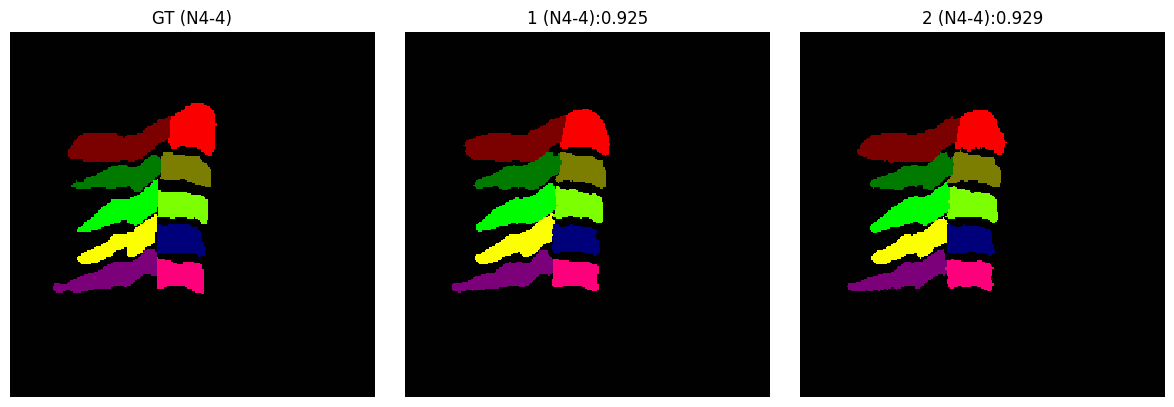

[ WARN:0@1111.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.579] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.579] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-6.png'): can't open/read file: check file

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
Count1 =  [58503, 1103, 569, 833, 636, 723, 388, 762, 515, 928, 576]
Count2 =  [58576, 1130, 638, 767, 553, 705, 551, 680, 538, 816, 582]
Count3 =  [58057, 1060, 550, 717, 493, 646, 366, 650, 496, 798, 552]
Dice =  [0.991757702064418, 0.9493954321540529, 0.9113504556752279, 0.89625, 0.8292682926829268, 0.9047619047619048, 0.7795527156549521, 0.9015256588072122, 0.9420702754036088, 0.9151376146788991, 

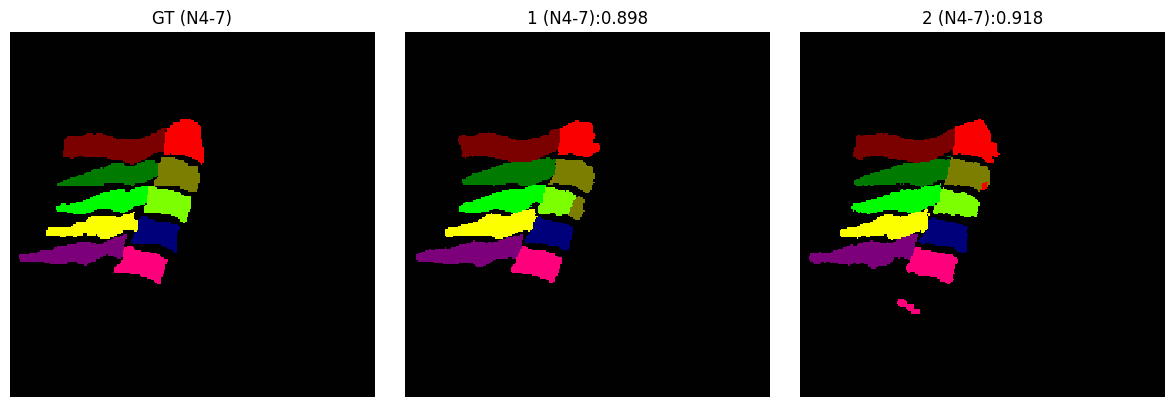

[ WARN:0@1111.766] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.766] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.766] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N4-9.png'): can't open/read file: check file

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
image: N5-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labele

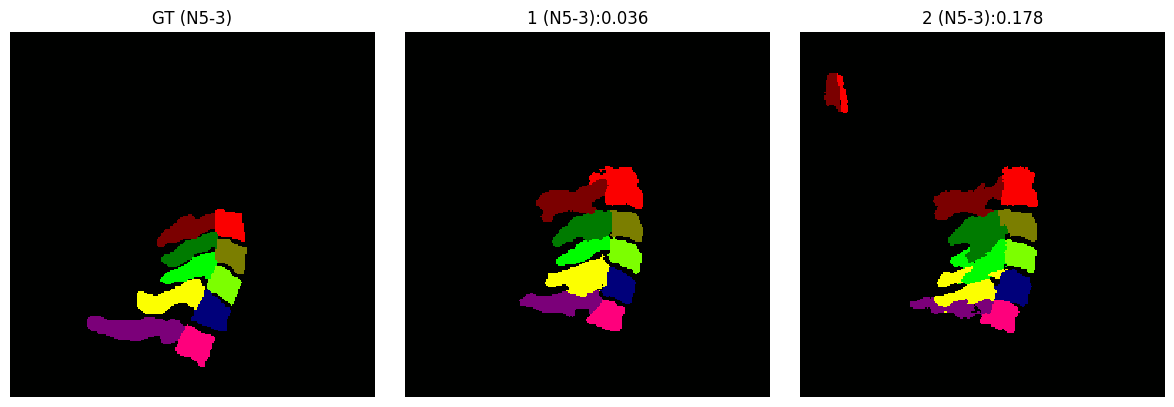

[ WARN:0@1111.963] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.963] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.963] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.965] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.965] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N5-5.png'): can't open/read file: check file

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
image: N5-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N

[ WARN:0@1111.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold2/crf/N5-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250915-MCU-Clahe/fold2/crf/N5-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-9.png'): can't open/read file: check file path/integrity
[ WARN:0@1111.968] glob

In [8]:

fold = "fold2"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'1 ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'2 ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")